In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [2]:
# Load the CSV file
file_path = '../../data/survey/Twitter_May_29,_2024_01.07.csv'
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Immigrants_1,Helping needy_1,Country,State,Education,Gender,Gender_4_TEXT,Ethnicity,Income,Age
0,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,Immigrants,Helping needy,List of Countries,"50 States, D.C. and Puerto Rico",What is the highest level of school you have c...,How do you describe yourself? - Selected Choice,How do you describe yourself? - Prefer to self...,Choose one or more races that you consider you...,What was your total household income before ta...,How old are you?
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}",...,"{""ImportId"":""QID61_1""}","{""ImportId"":""QID78_1""}","{""ImportId"":""QID16""}","{""ImportId"":""QID1215139908""}","{""ImportId"":""QID18""}","{""ImportId"":""QID88""}","{""ImportId"":""QID88_4_TEXT""}","{""ImportId"":""QID57""}","{""ImportId"":""QID62""}","{""ImportId"":""QID65_TEXT""}"
2,2024-03-18 08:46:12,2024-03-18 08:47:02,IP Address,100,50,True,2024-03-18 08:47:03,R_3sX6aUYcY3Gqqs7,anonymous,EN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-03-18 08:48:31,2024-03-18 08:56:43,IP Address,100,492,True,2024-03-18 08:56:44,R_4gjckliObAD0deV,anonymous,EN,...,-4,-2,Netherlands,NaN,High school graduate (high school diploma or e...,Prefer to self-describe,Sexy,American Indian/Native American or Alaska Nati...,Prefer not to say,46
4,2024-03-18 09:04:24,2024-03-18 09:04:50,IP Address,100,25,True,2024-03-18 09:04:50,R_8hzk6eehMQyDmA1,anonymous,EN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Display basic information about the DataFrame
print("Basic Information:")
df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StartDate                   97 non-null     object
 1   EndDate                     97 non-null     object
 2   Status                      97 non-null     object
 3   Progress                    97 non-null     object
 4   Duration (in seconds)       97 non-null     object
 5   Finished                    97 non-null     object
 6   RecordedDate                97 non-null     object
 7   ResponseId                  97 non-null     object
 8   DistributionChannel         97 non-null     object
 9   UserLanguage                97 non-null     object
 10  Q_RecaptchaScore            97 non-null     object
 11  Q_RelevantIDDuplicate       5 non-null      object
 12  Q_RelevantIDDuplicateScore  97 non-null     object
 13  Q_RelevantIDFraudScore      97 no

In [4]:
# Show summary statistics for numeric columns
print("Summary Statistics for Numeric Columns:")
df.describe()

Summary Statistics for Numeric Columns:


,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Immigrants_1,Helping needy_1,Country,State,Education,Gender,Gender_4_TEXT,Ethnicity,Income,Age
count,97,97,97,97,97,97,97,97,97,97,...,61,58,57,7,57,57,4,57,57,56
unique,97,97,3,20,88,4,97,97,3,3,...,12,10,11,6,7,7,4,12,9,25
top,Start Date,End Date,IP Address,100,23,True,Recorded Date,Response ID,anonymous,EN,...,-3,-5,Netherlands,California,Bachelor's degree (3 or 4-year),Male,How do you describe yourself? - Prefer to self...,White or Caucasian,"Less than $25,000",21
freq,1,1,95,67,4,67,1,1,95,95,...,12,12,22,2,22,26,1,41,13,8


In [5]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)

Missing Values:
StartDate                      0
EndDate                        0
Status                         0
Progress                       0
Duration (in seconds)          0
Finished                       0
RecordedDate                   0
ResponseId                     0
DistributionChannel            0
UserLanguage                   0
Q_RecaptchaScore               0
Q_RelevantIDDuplicate         92
Q_RelevantIDDuplicateScore     0
Q_RelevantIDFraudScore         0
Q_RelevantIDLastStartDate     92
Consent form                   0
Twitter use                    5
AI understanding              33
Application                   33
Experience                    32
Moderation                    32
Benefit to user               38
Fairness                      37
Trust algorithm mod.          37
Human moderation              35
Race discr.                   38
Sexual orient discr.          41
Gender discr.                 40
Religion discr.               39
Effective moderation       

# Pre-processing and Cleaning

In [6]:
# Convert the "Finished" column to string type
df['Finished'] = df['Finished'].astype(str)

# Drop rows where the "Finished" column has the string "False"
df = df[df['Finished'] != 'False']

# List of columns to check for unique values
columns_to_check = [
    'Q_RecaptchaScore',
    'Q_RelevantIDDuplicate',
    'Q_RelevantIDDuplicateScore',
    'Q_RelevantIDFraudScore',
    'Q_RelevantIDLastStartDate'
]

# Function to print unique values and their counts for specified columns
def print_unique_values_and_counts(df, columns):
    for column in columns:
        if column in df.columns:
            unique_values_counts = df[column].value_counts()
            print(f"Unique values and counts in '{column}' column:")
            print(unique_values_counts)
            print("\n")
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")

# Execute the function to print unique values and counts
print_unique_values_and_counts(df, columns_to_check)

# Convert Q_RelevantIDDuplicateScore and Q_RelevantIDFraudScore to string to handle non-numeric values
df['Q_RelevantIDDuplicateScore'] = df['Q_RelevantIDDuplicateScore'].astype(str)

# Drop rows where 'Q_RelevantIDDuplicateScore' is not zero
df = df[df['Q_RelevantIDDuplicateScore'] == '0']

# Display unique values in the "Twitter use" column
unique_values = df['Twitter use'].unique()
print("Unique values in 'Twitter use' column:")
print(unique_values)

# Convert all values in the "Twitter use" column to string
df['Twitter use'] = df['Twitter use'].astype(str)

# Drop all rows that have "Never" as a value in the "Twitter use" column
df = df[df['Twitter use'] != 'Never']

Unique values and counts in 'Q_RecaptchaScore' column:
Q_RecaptchaScore
0.8999999761581421                 37
1                                  12
0.699999988079071                   8
0.800000011920929                   6
0.4000000059604645                  2
Q_RecaptchaScore                    1
{"ImportId":"Q_RecaptchaScore"}     1
0.6000000238418579                  1
0.20000000298023224                 1
Name: count, dtype: int64


Unique values and counts in 'Q_RelevantIDDuplicate' column:
Q_RelevantIDDuplicate
true                                    3
Q_RelevantIDDuplicate                   1
{"ImportId":"Q_RelevantIDDuplicate"}    1
Name: count, dtype: int64


Unique values and counts in 'Q_RelevantIDDuplicateScore' column:
Q_RelevantIDDuplicateScore
0                                            64
Q_RelevantIDDuplicateScore                    1
{"ImportId":"Q_RelevantIDDuplicateScore"}     1
98                                            1
100                                   

In [7]:
# List of columns to drop
columns_to_drop = [
    "Status", "DistributionChannel", "Q_RecaptchaScore",
    "Q_RelevantIDDuplicate", "Q_RelevantIDDuplicateScore",
    "Q_RelevantIDFraudScore", "Q_RelevantIDLastStartDate",
    "Consent form", "Duration (in seconds)", "Gender_4_TEXT",
    "UserLanguage", "State"
]

# Drop the columns
df = df.drop(columns=columns_to_drop, errors='ignore')

# Display the columns in the cleaned DataFrame
cleaned_columns = df.columns.tolist()

# Display the first few rows to understand the data
first_cleaned_rows = df.head()

cleaned_columns, first_cleaned_rows


(['StartDate',
  'EndDate',
  'Progress',
  'Finished',
  'RecordedDate',
  'ResponseId',
  'Twitter use',
  'AI understanding',
  'Application',
  'Experience',
  'Moderation',
  'Benefit to user',
  'Fairness',
  'Trust algorithm mod.',
  'Human moderation',
  'Race discr.',
  'Sexual orient discr.',
  'Gender discr.',
  'Religion discr.',
  'Effective moderation',
  'AI acceleration',
  'AI + human',
  'Hate speech',
  'Misinformation',
  'Disinformation',
  'Political spectrum_1',
  'Minimum wage_1',
  'Schooling_1',
  'Immigrants_1',
  'Helping needy_1',
  'Country',
  'Education',
  'Gender',
  'Ethnicity',
  'Income',
  'Age'],
               StartDate              EndDate Progress Finished  \
 6   2024-03-18 09:03:45  2024-03-18 09:10:58      100     True   
 8   2024-03-18 12:46:01  2024-03-18 12:49:40      100     True   
 9   2024-03-18 10:23:40  2024-03-18 13:16:00      100     True   
 10  2024-03-19 07:24:11  2024-03-19 07:28:52      100     True   
 11  2024-03-19 10:05:

In [8]:
# Ensure the 'Twitter use' column is present
if 'Twitter use' in df.columns:
    # Normalize text by stripping spaces and converting to lowercase
    df['Twitter use'] = df['Twitter use'].str.strip().str.lower()

    # Define the mapping for the responses
    response_mapping = {
        "a few times per year or less": 1,
        "a few times per month": 2,
        "a few times per week": 3,
        "multiple times per day": 4
    }

    # Apply the mapping to the 'Twitter use' column and convert to float
    df['Twitter use'] = df['Twitter use'].map(response_mapping).astype('float')

# Verify the changes
print(df['Twitter use'].value_counts(dropna=False))


Twitter use
4.0    25
1.0     8
3.0     7
2.0     7
Name: count, dtype: int64


In [9]:
# Columns for each concept
familiarity_columns = ["AI understanding", "Application", "Experience", "Moderation"]
trust_columns = ["Benefit to user", "Fairness", "Trust algorithm mod.", "Human moderation", 
                 "Race discr.", "Sexual orient discr.", "Gender discr.", "Religion discr."]
efficacy_columns = ["Effective moderation", "AI acceleration", "AI + human", 
                    "Hate speech", "Misinformation", "Disinformation"]

# Combine all columns
all_columns = familiarity_columns + trust_columns + efficacy_columns

# Display the unique values in the columns to check for discrepancies
def check_unique_values(df, columns):
    for column in columns:
        if column in df.columns:
            print(f"Unique values for '{column}':")
            print(df[column].unique())
            print("\n")
        else:
            print(f"Column '{column}' does not exist in the DataFrame.\n")

check_unique_values(df, all_columns)

# Normalize text by stripping spaces and converting to lowercase
for column in all_columns:
    if column in df.columns:
        df[column] = df[column].str.strip().str.lower()

# Define the mapping for the Likert scale responses
likert_mapping = {
    "strongly disagree": 1,
    "disagree": 2,
    "somewhat disagree": 3,
    "neither agree nor disagree": 4,
    "somewhat agree": 5,
    "agree": 6,
    "strongly agree": 7
}

# Apply the mapping to the relevant columns
for column in all_columns:
    if column in df.columns:
        df[column] = df[column].map(likert_mapping).astype('float')

# Function to print value counts for each column in the list
def print_value_counts(df, columns):
    for column in columns:
        if column in df.columns:
            print(f"Value counts for '{column}':")
            print(df[column].value_counts(dropna=False))
            print("\n")
        else:
            print(f"Column '{column}' does not exist in the DataFrame.\n")

# Print value counts for the specified columns
print_value_counts(df, all_columns)

Unique values for 'AI understanding':
['Neither agree nor disagree' 'Strongly Agree' 'Somewhat Agree' 'Agree'
 'Disagree' 'Somewhat Disagree']


Unique values for 'Application':
['Somewhat Agree' 'Strongly Agree' 'Agree' 'Strongly Disagree'
 'Neither agree nor disagree' 'Somewhat Disagree']


Unique values for 'Experience':
['Agree' 'Strongly Agree' 'Somewhat Agree' 'Neither agree nor disagree'
 'Strongly Disagree' 'Disagree' 'Somewhat Disagree']


Unique values for 'Moderation':
['Somewhat Disagree' 'Agree' 'Somewhat Agree' 'Strongly Disagree'
 'Disagree' 'Neither agree nor disagree' 'Strongly Agree']


Unique values for 'Benefit to user':
['Neither agree nor disagree' 'Somewhat Agree' 'Strongly Disagree'
 'Somewhat Disagree' 'Disagree' 'Strongly Agree' 'Agree']


Unique values for 'Fairness':
['Disagree' 'Strongly disagree' 'Neither agree nor disagree'
 'Somewhat agree' 'Somewhat disagree' 'Agree']


Unique values for 'Trust algorithm mod.':
['Disagree' 'Somewhat Disagree' 'Somewhat 

In [10]:
# Columns to process
politics_columns = [
    "Political spectrum_1", "Minimum wage_1", "Schooling_1", 
    "Immigrants_1", "Helping needy_1"
]

# Normalize the Political spectrum_1 column (already 0 to 10 scale, so we just verify)
df["Political spectrum_1"] = df["Political spectrum_1"].astype('float')

# Normalize other columns
df["Minimum wage_1"] = df["Minimum wage_1"].astype('float')
df["Schooling_1"] = df["Schooling_1"].astype('float')
df["Immigrants_1"] = df["Immigrants_1"].astype('float')
df["Helping needy_1"] = df["Helping needy_1"].astype('float')

# Function to normalize columns from -5 to 5 to 0 to 10
def normalize_column(series, original_min, original_max, new_min, new_max):
    return ((series - original_min) * (new_max - new_min) / (original_max - original_min)) + new_min

# Normalize other columns from -5 to 5 to 0 to 10
for column in politics_columns[1:]:
    df[column] = df[column].astype('float')  # Ensure the column is float for NaN handling
    df[column] = normalize_column(df[column], -5, 5, 0, 10)

# Print value counts for the specified columns to verify the mapping
def print_value_counts(df, columns):
    for column in columns:
        if column in df.columns:
            print(f"Value counts for '{column}':")
            print(df[column].value_counts(dropna=False))
            print("\n")
        else:
            print(f"Column '{column}' does not exist in the DataFrame.\n")

# Print value counts for the specified columns
print_value_counts(df, politics_columns)


Value counts for 'Political spectrum_1':
Political spectrum_1
2.0    9
0.0    8
1.0    7
3.0    6
5.0    5
6.0    4
7.0    3
8.0    2
9.0    1
NaN    1
4.0    1
Name: count, dtype: int64


Value counts for 'Minimum wage_1':
Minimum wage_1
3.0     12
0.0     11
1.0      4
4.0      4
7.0      4
2.0      3
5.0      3
8.0      2
6.0      2
10.0     2
Name: count, dtype: int64


Value counts for 'Schooling_1':
Schooling_1
0.0    27
3.0     6
1.0     5
2.0     4
5.0     3
8.0     1
6.0     1
Name: count, dtype: int64


Value counts for 'Immigrants_1':
Immigrants_1
2.0     11
0.0     10
1.0      7
5.0      6
4.0      4
7.0      4
3.0      2
10.0     1
6.0      1
8.0      1
Name: count, dtype: int64


Value counts for 'Helping needy_1':
Helping needy_1
0.0    10
3.0     8
6.0     6
1.0     5
4.0     5
5.0     4
2.0     4
NaN     3
7.0     2
Name: count, dtype: int64




In [12]:
# List of columns to process
demographics_columns = [
    "Country", "Education", "Gender", "Ethnicity", "Income", "Age"
]

# Convert all values to strings
for column in demographics_columns:
    df[column] = df[column].astype(str)

# Function to get unique values for each column
def get_unique_values(df, columns):
    for column in columns:
        unique_values = df[column].unique()
        print(f"Unique values in '{column}' column:")
        print(unique_values)
        print("\n")

# Get unique values for the specified columns
get_unique_values(df, demographics_columns)

Unique values in 'Country' column:
['Netherlands' 'United Kingdom of Great Britain and Northern Ireland'
 'Poland' 'Germany' 'Canada' 'United States of America' 'Sweden'
 'Pakistan']


Unique values in 'Education' column:
['High school graduate (high school diploma or equivalent)'
 'Some tertiary education but no degree' "Bachelor's degree (3 or 4-year)"
 "Master's degree" 'Less than high school degree']


Unique values in 'Gender' column:
['Female' 'Male' 'Non-binary / third gender' 'Prefer not to say'
 'Prefer to self-describe']


Unique values in 'Ethnicity' column:
['White or Caucasian' 'White or Caucasian,Other' 'Other'
 'White or Caucasian,Asian' 'White or Caucasian,Black or African American'
 'Prefer not to say' 'Asian,Other' 'Asian']


Unique values in 'Income' column:
['Prefer not to say' 'Less than $25,000' '$25,000-$49,999'
 '$150,000 or more' '$75,000-$99,999' '$50,000-$74,999'
 '$100,000-$149,999']


Unique values in 'Age' column:
['20' '24' '21' '57' '26' '27' '23' '25' '

In [13]:
# Columns to process
demographics_columns = [
    "Country", "Education", "Gender", "Ethnicity", "Income", "Age"
]

# Replace 'nan' string with actual NaN values
df.replace('nan', np.nan, inplace=True)

# Convert 'Age' column to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Normalize text by stripping spaces and converting to lowercase
for column in demographics_columns:
    if column in df.columns and df[column].dtype == 'object':
        df[column] = df[column].str.strip().str.lower()

# Custom mappings
education_mapping = {
    "less than high school degree": 0.0,
    "high school graduate (high school diploma or equivalent)": 1.0,
    "some tertiary education but no degree": 2.0,
    "associate degree (2-year)": 3.0,
    "bachelor's degree (3 or 4-year)": 4.0,
    "master's degree": 5.0,
    "doctoral degree": 6.0,
    "professional degree": 7.0
}

gender_mapping = {
    "male": 0.0,
    "female": 1.0,
    "non-binary / third gender": 2.0,
    "prefer to self-describe": 3.0,
    "prefer not to say": 4.0
}

ethnicity_mapping = {
    "white or caucasian": 0.0,
    "black or african american": 1.0,
    "american indian/native american or alaska native": 2.0,
    "asian": 3.0,
    "native hawaiian or other pacific islander": 4.0,
    "other": 5.0,
    "white or caucasian,other": 6.0,
    "white or caucasian,asian": 7.0,
    "white or caucasian,black or african american": 8.0,
    "asian,other": 9.0,
    "prefer not to say": np.nan
}

income_mapping = {
    "less than $25,000": 0.0,
    "$25,000-$49,999": 1.0,
    "$50,000-$74,999": 2.0,
    "$75,000-$99,999": 3.0,
    "$100,000-$149,999": 4.0,
    "$150,000 or more": 5.0,
    "prefer not to say": np.nan
}

# Function to apply custom mappings
def apply_custom_mapping(df, column, mapping):
    if column in df.columns:
        df[column] = df[column].map(mapping)
    return df

# Apply custom mappings
df = apply_custom_mapping(df, "Education", education_mapping)
df = apply_custom_mapping(df, "Gender", gender_mapping)
df = apply_custom_mapping(df, "Ethnicity", ethnicity_mapping)
df = apply_custom_mapping(df, "Income", income_mapping)

# Verify the changes
print(df[demographics_columns].head())

# Check the datatypes
print(df.dtypes)

# Print value counts for the specified columns to verify the changes
def print_value_counts(df, columns):
    for column in columns:
        if column in df.columns:
            print(f"Value counts for '{column}':")
            print(df[column].value_counts(dropna=False))
            print("\n")
        else:
            print(f"Column '{column}' does not exist in the DataFrame.\n")

# Print value counts for the specified columns
print_value_counts(df, demographics_columns)


                                              Country  Education  Gender  \
6                                         netherlands        1.0     1.0   
8                                         netherlands        2.0     1.0   
9                                         netherlands        2.0     1.0   
10  united kingdom of great britain and northern i...        4.0     0.0   
11  united kingdom of great britain and northern i...        5.0     1.0   

    Ethnicity  Income  Age  
6         0.0     NaN   20  
8         0.0     0.0   24  
9         0.0     1.0   21  
10        0.0     5.0   57  
11        6.0     3.0   26  
StartDate                object
EndDate                  object
Progress                 object
Finished                 object
RecordedDate             object
ResponseId               object
Twitter use             float64
AI understanding        float64
Application             float64
Experience              float64
Moderation              float64
Benefit to user  

# Saving Cleaned CSV

In [14]:
# Save the DataFrame to a CSV file
output_file_path = 'processed_survey_data.csv'
df.to_csv(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")

DataFrame saved to processed_survey_data.csv


# Creating composite scores for concepts

In [22]:
# Ensure the relevant columns are numeric
political_columns = ["Political spectrum_1", "Minimum wage_1", "Schooling_1", "Immigrants_1", "Helping needy_1"]
for column in political_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Optionally handle missing values (e.g., by filling with the mean, median, or a specific value)
df[political_columns] = df[political_columns].fillna(df[political_columns].mean())

# Calculate the composite score (e.g., by summing the columns)
df['Political_leaning_score'] = df[political_columns].sum(axis=1)

# Display the first few rows to verify the composite score
print(df[['Political_leaning_score']].head())

# Verify the data types
print(df.dtypes)

# Print value counts for the composite score to verify the changes
print(df['Political_leaning_score'].value_counts(dropna=False))


    Political_leaning_score
6                       7.0
8                       2.0
9                       3.0
10                      8.0
11                     28.0
StartDate                   object
EndDate                     object
Progress                    object
Finished                    object
RecordedDate                object
ResponseId                  object
Twitter use                float64
AI understanding           float64
Application                float64
Experience                 float64
Moderation                 float64
Benefit to user            float64
Fairness                   float64
Trust algorithm mod.       float64
Human moderation           float64
Race discr.                float64
Sexual orient discr.       float64
Gender discr.              float64
Religion discr.            float64
Effective moderation       float64
AI acceleration            float64
AI + human                 float64
Hate speech                float64
Misinformation             

In [24]:
# Define the columns for each concept
familiarity_columns = ["AI understanding", "Application", "Experience", "Moderation"]
trust_columns = ["Benefit to user", "Fairness", "Trust algorithm mod.", "Human moderation", 
                 "Race discr.", "Sexual orient discr.", "Gender discr.", "Religion discr."]
efficacy_columns = ["Effective moderation", "AI acceleration", "AI + human", 
                    "Hate speech", "Misinformation", "Disinformation"]

# Ensure the relevant columns are numeric
for column in familiarity_columns + trust_columns + efficacy_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Optionally handle missing values (e.g., by filling with the mean, median, or a specific value)
df[familiarity_columns] = df[familiarity_columns].fillna(df[familiarity_columns].mean())
df[trust_columns] = df[trust_columns].fillna(df[trust_columns].mean())
df[efficacy_columns] = df[efficacy_columns].fillna(df[efficacy_columns].mean())

# Calculate the composite scores by summing the columns for each concept
df['Familiarity_with_AI_score'] = df[familiarity_columns].sum(axis=1)
df['Trust_in_AI_score'] = df[trust_columns].sum(axis=1)
df['Efficacy_of_AI_moderation_score'] = df[efficacy_columns].sum(axis=1)

# Display the first few rows to verify the composite scores
print(df[['Familiarity_with_AI_score', 'Trust_in_AI_score', 'Efficacy_of_AI_moderation_score']].head())

# Verify the data types
print(df.dtypes)

# Print value counts for the composite scores to verify the changes
print(df['Familiarity_with_AI_score'].value_counts(dropna=False))
print(df['Trust_in_AI_score'].value_counts(dropna=False))
print(df['Efficacy_of_AI_moderation_score'].value_counts(dropna=False))


    Familiarity_with_AI_score  Trust_in_AI_score  \
6                        18.0               15.0   
8                        24.0               18.0   
9                        26.0               33.0   
10                       20.0               34.0   
11                       23.0               10.0   

    Efficacy_of_AI_moderation_score  
6                              27.0  
8                              12.0  
9                              25.0  
10                             18.0  
11                             13.0  
StartDate                           object
EndDate                             object
Progress                            object
Finished                            object
RecordedDate                        object
ResponseId                          object
Twitter use                        float64
AI understanding                   float64
Application                        float64
Experience                         float64
Moderation                   

In [26]:
# List of composite score columns
composite_columns = ['Familiarity_with_AI_score', 'Trust_in_AI_score', 'Efficacy_of_AI_moderation_score', 'Political_leaning_score']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df[composite_columns] = scaler.fit_transform(df[composite_columns])

# Display the first few rows to verify the standardized composite scores
print(df[composite_columns].head())

# Print summary statistics to verify the standardization
print(df[composite_columns].describe())


    Familiarity_with_AI_score  Trust_in_AI_score  \
6                   -0.608482          -1.156327   
8                    0.691457          -0.867395   
9                    1.124770           0.577268   
10                  -0.175169           0.673579   
11                   0.474801          -1.637881   

    Efficacy_of_AI_moderation_score  Political_leaning_score  
6                          0.783555                -0.683855  
8                         -1.503224                -1.223597  
9                          0.478651                -1.115648  
10                        -0.588513                -0.575907  
11                        -1.350772                 1.583060  
       Familiarity_with_AI_score  Trust_in_AI_score  \
count               4.700000e+01       4.700000e+01   
mean               -2.125959e-17       2.244068e-17   
std                 1.010811e+00       1.010811e+00   
min                -3.425018e+00      -1.637881e+00   
25%                -6.084823e-01  

In [27]:
# Save the DataFrame to a CSV file
output_file_path = 'processed_survey_data.csv'
df.to_csv(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")

DataFrame saved to processed_survey_data.csv


# Analysis

In [28]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Assuming the DataFrame 'df' is already loaded and preprocessed
# Independent variable
X = df['Political_leaning_score']

# Standardize the independent variable (optional, but often recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values.reshape(-1, 1))

# Add a constant to the independent variable (for intercept)
X_scaled = sm.add_constant(X_scaled)

# List of dependent variables (responses to measured concepts)
dependent_vars = ['Familiarity_with_AI_score', 'Trust_in_AI_score', 'Efficacy_of_AI_moderation_score']

# Function to perform regression and print summary for each dependent variable
def perform_regression(X, y):
    model = sm.OLS(y, X).fit()
    print(model.summary())

# Perform regression for each dependent variable
for var in dependent_vars:
    print(f"Regression results for '{var}':")
    y = df[var].dropna()
    X_var = X_scaled[df[var].notna()]  # Ensure X and y have the same length
    perform_regression(X_var, y)
    print("\n")


Regression results for 'Familiarity_with_AI_score':
                                OLS Regression Results                               
Dep. Variable:     Familiarity_with_AI_score   R-squared:                       0.014
Model:                                   OLS   Adj. R-squared:                 -0.008
Method:                        Least Squares   F-statistic:                    0.6367
Date:                       Thu, 06 Jun 2024   Prob (F-statistic):              0.429
Time:                               08:59:11   Log-Likelihood:                -66.360
No. Observations:                         47   AIC:                             136.7
Df Residuals:                             45   BIC:                             140.4
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------

In [16]:
# Extracting data for the two groups
male_trust = df[df['Gender'] == 0]['Trust algorithm mod.'].dropna()
female_trust = df[df['Gender'] == 1]['Trust algorithm mod.'].dropna()

# Performing the t-test
t_stat, p_value = ttest_ind(male_trust, female_trust)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: 2.841568255228126, P-Value: 0.007103417705143105


In [17]:
# Correlation matrix
correlation_matrix = df[['AI understanding', 'Application', 'Experience', 'Moderation',
                         'Benefit to user', 'Fairness', 'Trust algorithm mod.', 'Human moderation',
                         'Race discr.', 'Sexual orient discr.', 'Gender discr.', 'Religion discr.',
                         'Effective moderation', 'AI acceleration', 'AI + human', 'Hate speech',
                         'Misinformation', 'Disinformation']].corr()

print(correlation_matrix)


                      AI understanding  Application  Experience  Moderation  \
AI understanding              1.000000     0.601022    0.554767    0.504829   
Application                   0.601022     1.000000    0.463030    0.413970   
Experience                    0.554767     0.463030    1.000000    0.358604   
Moderation                    0.504829     0.413970    0.358604    1.000000   
Benefit to user               0.326779     0.221210    0.399884    0.259737   
Fairness                      0.171058     0.148911    0.230186    0.403789   
Trust algorithm mod.          0.283692     0.301321    0.265623    0.331249   
Human moderation              0.235703     0.134354    0.164829    0.048224   
Race discr.                   0.074141     0.100737    0.011872    0.149633   
Sexual orient discr.          0.122544     0.137730    0.124941    0.221102   
Gender discr.                 0.165508     0.129912    0.118064    0.306205   
Religion discr.               0.044450     0.057258 

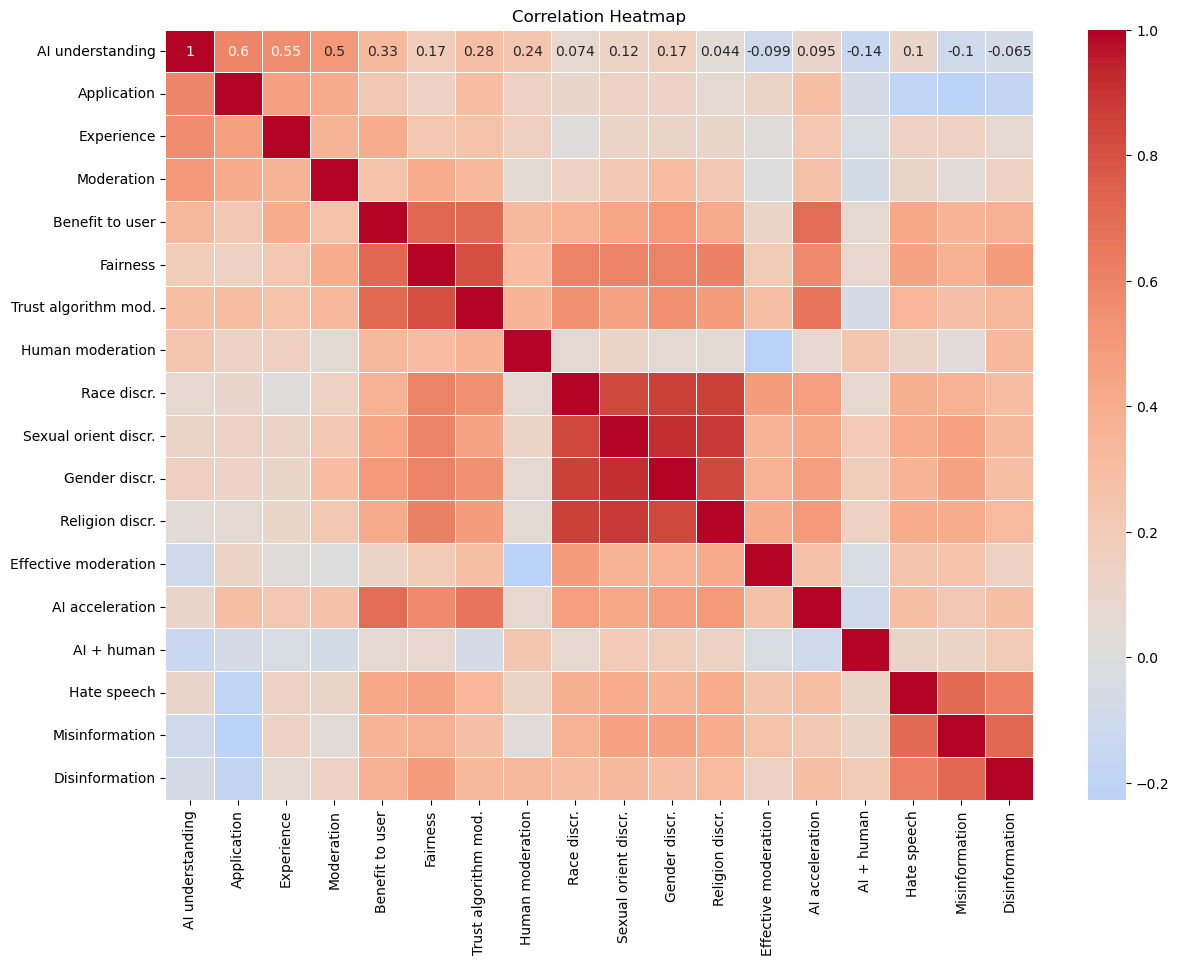

In [19]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()
